## 6.1.4 Plot ROC and AUC using Python
The following Python codes show examples of how to derive the ROC plots and AUC scores of multiple models built using various data modeling algorithms (DecisionTree, LogisticsRegression, and SVC). After deriving the AUC of each model, we compare their performances using a ROC chart.

The comments embedded in the codes give descriptions to guide the rationale of the programming logic. 

AUC for DecisionTree:  0.7552
AUC for Logistic Regression:  0.7058
AUC for SVC:  0.7029


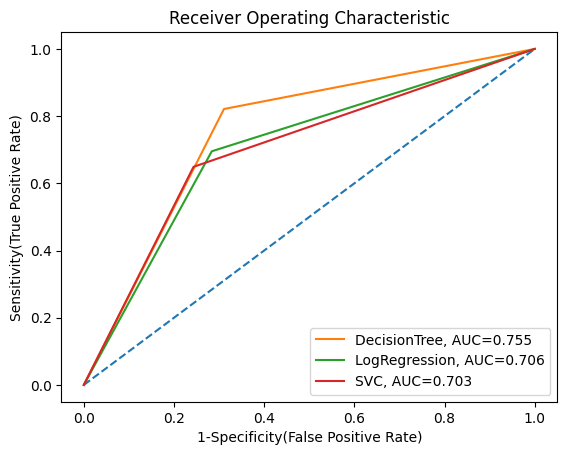

541    1.0
673    0.0
947    1.0
89     0.0
209    0.0
      ... 
81     0.0
872    0.0
881    0.0
235    0.0
258    1.0
Name: Churn, Length: 697, dtype: float64


<Figure size 640x480 with 0 Axes>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# specify dataset source, inputs and target
df = pd.read_csv('data/ChurnFinal.csv')

# need to convert categorical to numeric for Python ROC and AUC calculations
df.loc[df['Churn'] == 'yes', 'Churn'] = 1
df.loc[df['Churn'] == 'no', 'Churn'] = 0
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce').astype('float')

# specify inputs and label
df_inputs = pd.get_dummies(df[['Gender', 'Age', 'PostalCode', 'Cash', 'CreditCard', 
                'Cheque', 'SinceLastTrx', 'SqrtTotal', 'SqrtMax', 'SqrtMin']])
df_label = df['Churn']

# initiate modelling objects using differnt algorithms
clf_tree = DecisionTreeClassifier(criterion = 'entropy', splitter="best", 
            max_depth=5, min_samples_leaf=5, min_samples_split=0.1, random_state=7) 
clf_lgreg =LogisticRegression(solver='liblinear',  random_state=7, max_iter=300)
clf_svc =SVC(random_state=7)

# spliting train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_inputs, df_label, 
            stratify=df_label, test_size=0.3, random_state=1) 

# train models
clf_tree.fit(X_train, y_train)
clf_lgreg.fit(X_train, y_train)
clf_svc.fit(X_train, y_train)

# apply models for predictions
y_predict1 = clf_tree.predict(X_test)
y_predict2 = clf_lgreg.predict(X_test)
y_predict3 = clf_svc.predict(X_test)

# derive ROC AUC scores of each model
auc1 = roc_auc_score(y_test, y_predict1)
auc2 = roc_auc_score(y_test, y_predict2)
auc3 = roc_auc_score(y_test, y_predict3)
print('AUC for DecisionTree: ', round(auc1,4))
print('AUC for Logistic Regression: ', round(auc2,4))
print('AUC for SVC: ', round(auc3,4))

# initiate the plots of ROC charts for each model
plt.figure(0).clf()
plt.plot([0, 1], ls="--")

#fit DecisionTree model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_predict1)
plt.plot(fpr,tpr,label="DecisionTree, AUC="+str(round(auc1,3)))

#fit LogisticRegression model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_predict2)
plt.plot(fpr,tpr,label="LogRegression, AUC="+str(round(auc2,3)))

#fit SVC model and plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_predict3)
plt.plot(fpr,tpr,label="SVC, AUC="+str(round(auc3,3)))

#add legend information
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# save to ROC chart to file
import os

strFile = "plot_roc.png"

if os.path.isfile(strFile):
   os.remove(strFile)   
plt.savefig('img/'+strFile) 
plt.clf() 

print(y_train)

As presented in the ROC chart, the model built using the decision tree algorithm achieves the highest AUC score, and its ROC curve positions higher than other models. We can conclude that the DeicsionTree model performs on the Churn data better than the other two models using Logistics Regression and SVC algorithms.  

NOTE: For a detailed explanation of the Python API performance `metrics()` parameters, refer to the official website, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve.  